In [2]:
import geopandas as gpd

buildings = gpd.read_parquet('./../data/platform/buildings.parquet').rename(columns={
    'building_area' : 'footprint_area',
    'storeys_count' : 'number_of_floors',
    'population_balanced': 'population',
})[['geometry', 'is_living', 'footprint_area', 'number_of_floors', 'population', 'living_area']]
buildings.head()

,geometry,is_living,footprint_area,number_of_floors,population,living_area
0,"POLYGON ((26319.490 6682759.262, 26315.099 668...",True,95.155945,1.0,3,66.609161
1,"POLYGON ((26247.648 6682735.641, 26255.964 668...",True,97.709000,1.0,0,68.396301
2,"POLYGON ((25121.683 6682189.882, 25110.493 668...",True,706.651001,20.0,144,9893.114260
3,"POLYGON ((25099.575 6681917.845, 25097.969 668...",True,721.190125,25.0,235,12620.827100
4,"POLYGON ((25138.368 6681976.699, 25150.524 668...",True,1543.230220,21.0,337,22685.484400


## Buildings

In [3]:
from blocksnet.preprocessing.imputing import impute_buildings

buildings = impute_buildings(buildings)

2025-03-22 14:41:29.375 | WARNING  | blocksnet.preprocessing.imputing.buildings.schemas:_before_validate:21 - Column build_floor_area not found and will be initialized as None
2025-03-22 14:41:29.375 | WARNING  | blocksnet.preprocessing.imputing.buildings.schemas:_before_validate:21 - Column non_living_area not found and will be initialized as None


In [4]:
buildings.head()

,geometry,is_living,number_of_floors,footprint_area,build_floor_area,living_area,non_living_area,population
0,"POLYGON ((26319.490 6682759.262, 26315.099 668...",True,1.0,95.155945,95.155945,66.609161,28.546783,3.0
1,"POLYGON ((26247.648 6682735.641, 26255.964 668...",True,1.0,97.709000,97.709000,68.396301,29.312698,3.0
2,"POLYGON ((25121.683 6682189.882, 25110.493 668...",True,20.0,706.651001,14133.020020,9893.114260,4239.905760,144.0
3,"POLYGON ((25099.575 6681917.845, 25097.969 668...",True,25.0,721.190125,18029.753125,12620.827100,5408.926025,235.0
4,"POLYGON ((25138.368 6681976.699, 25150.524 668...",True,21.0,1543.230220,32407.834620,22685.484400,9722.350220,337.0


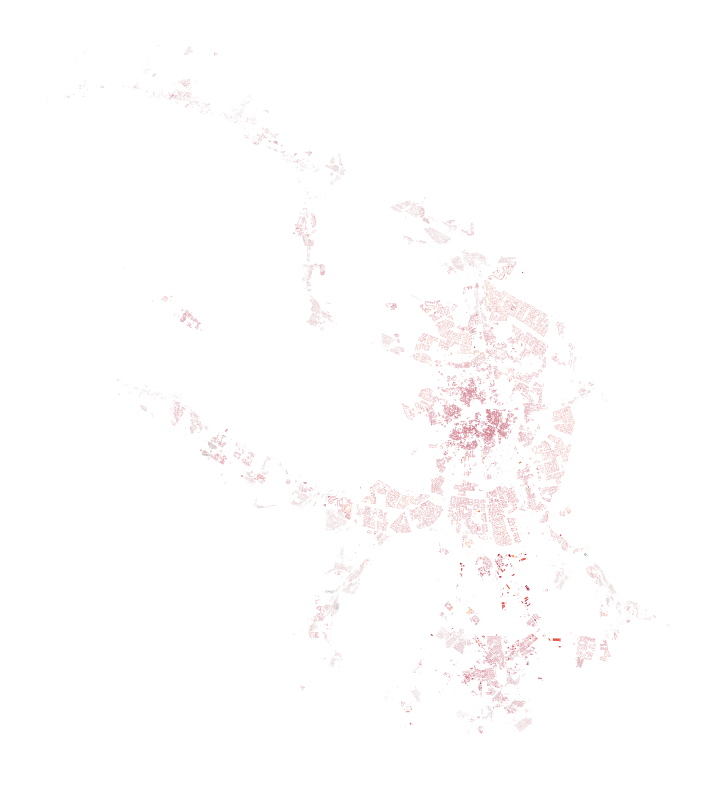

In [5]:
buildings[buildings.population>0].plot('population', cmap='RdYlGn', figsize=(10,10)).set_axis_off()

## Services

In [8]:
services = gpd.read_parquet('./../data/platform/school.parquet')
services.head()

,geometry,capacity
0,"MULTIPOLYGON (((20052.971 6681274.597, 20064.0...",448
1,"MULTIPOLYGON (((11237.313 6677237.236, 11255.6...",698
2,"MULTIPOLYGON (((20636.615 6680834.563, 20659.2...",2126
3,"MULTIPOLYGON (((-14715.947 6676494.498, -14711...",1719
4,"MULTIPOLYGON (((-15507.145 6677446.344, -15490...",735
